In [1]:
import json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.family"] = "Times New Roman"

SMALL_SIZE = 11
MEDIUM_SIZE = 15
BIGGER_SIZE = 16

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
def get_confusion_matrix(prediction, target, choices = [" positive", " negative"]):
    for i in range(len(prediction)):
        if(prediction[i] not in choices):
            for wrong in choices:
                if(wrong != target[i]):
                    prediction[i] = wrong
    tn, fp, fn, tp = confusion_matrix(target, prediction).ravel()
    return tn, fp, fn, tp

## Parameter Tuning

In [3]:
exp1_path = "Saved_weights/EXP1/"
prompt_log_format = "Prompt-Tuning/gpt2-medium/logs_prompt_size__{}.json"
prompt_dims = [2, 4, 8, 16, 32]
bal_acc = []

for prefix_size in prompt_dims:
    with open(exp1_path + prompt_log_format.format(prefix_size)) as f:
        result = json.load(f)
    cur_acc = result["test_logs"]["balanced_accuracy"]
    if(cur_acc == -1):
        tn, fp, fn, tp = get_confusion_matrix(result["test_logs"]["prediction"], result["test_logs"]["target"])
        sensitivity = tp/(tp + fn)
        specificity = tn/(tn + fp)
        cur_acc = (sensitivity + specificity)/2
    bal_acc.append(cur_acc)

In [4]:
bal_acc

[0.9161499322701206,
 0.921526865417752,
 0.9263969760591246,
 0.9264979046017163,
 0.9320026229905185]

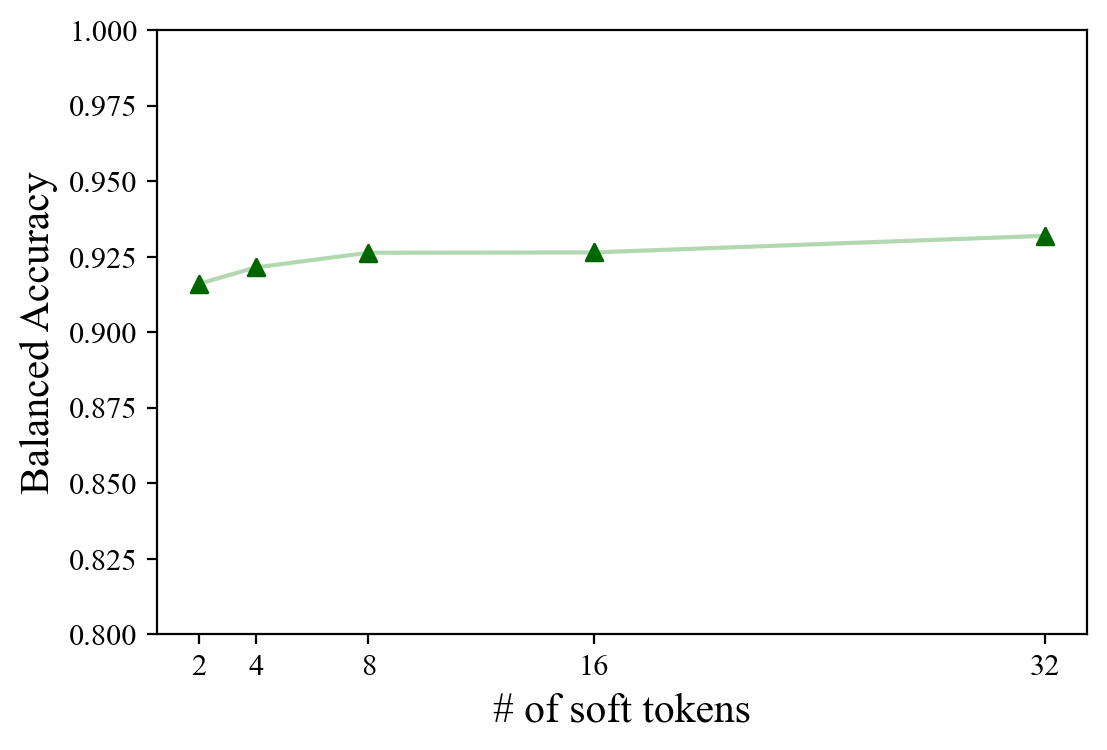

In [5]:
plt.scatter(prompt_dims, bal_acc, marker = "^", c = "darkgreen")
plt.plot(prompt_dims, bal_acc, alpha = 0.3, c = "green")
plt.xticks(prompt_dims)
plt.gca().set_ylim(bottom=0.8, top = 1.0)
plt.ylabel("Balanced Accuracy")
plt.xlabel("# of soft tokens")
plt.savefig("Figures/param_prompt_tuning.pdf", format="pdf", bbox_inches='tight')

In [6]:
exp1_path = "Saved_weights/EXP1/"
prompt_log_format = "Prefix-Tuning/gpt2-medium/logs_prefix_size__{}.json"
prompt_dims = [2, 4, 8, 16, 32]
bal_acc = []

for prefix_size in prompt_dims:
    with open(exp1_path + prompt_log_format.format(prefix_size)) as f:
        result = json.load(f)
    cur_acc = result["test_logs"]["balanced_accuracy"]
    if(cur_acc == -1):
        tn, fp, fn, tp = get_confusion_matrix(result["test_logs"]["prediction"], result["test_logs"]["target"])
        sensitivity = tp/(tp + fn)
        specificity = tn/(tn + fp)
        cur_acc = (sensitivity + specificity)/2
    bal_acc.append(cur_acc)

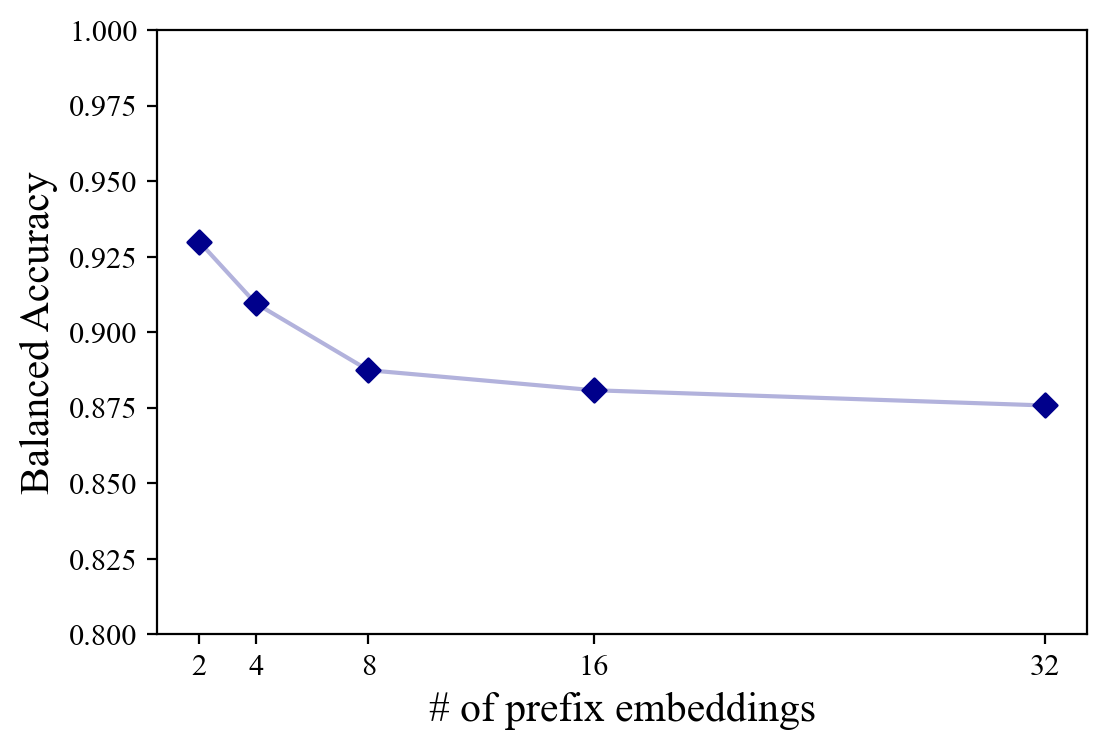

In [7]:
plt.scatter(prompt_dims, bal_acc, marker = "D", c = "darkblue")
plt.plot(prompt_dims, bal_acc, alpha = 0.3, c = "darkblue")
plt.xticks(prompt_dims)
plt.gca().set_ylim(bottom=0.8, top = 1.0)
plt.ylabel("Balanced Accuracy")
plt.xlabel("# of prefix embeddings")
plt.savefig("Figures/param_prefix_tuning.pdf", format="pdf", bbox_inches='tight')

In [8]:
exp1_path = "Saved_weights/EXP1/"
prompt_log_format = "Adapters/gpt2-medium/logs_adapter_dim__{}.json"
adapter_dims = [16, 32, 64, 128, 256, 512, 1024]
bal_acc = []

for adapter_size in adapter_dims:
    with open(exp1_path + prompt_log_format.format(adapter_size)) as f:
        result = json.load(f)
    cur_acc = result["test_logs"]["balanced_accuracy"]
    if(cur_acc == -1):
        tn, fp, fn, tp = get_confusion_matrix(result["test_logs"]["prediction"], result["test_logs"]["target"])
        sensitivity = tp/(tp + fn)
        specificity = tn/(tn + fp)
        cur_acc = (sensitivity + specificity)/2
    bal_acc.append(cur_acc)

In [9]:
adapter_dims = adapter_dims[:-1]
bal_acc = bal_acc[:-1]

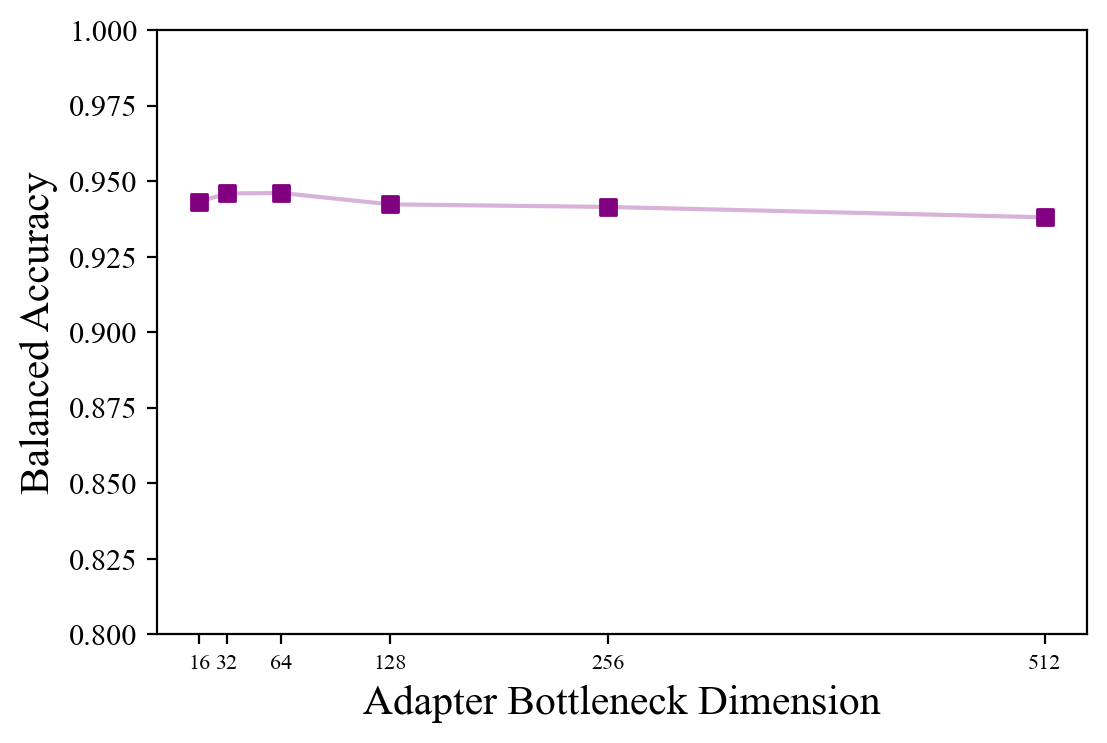

In [10]:
plt.rc("xtick", labelsize=8)  # fontsize of the tick labels
plt.scatter(adapter_dims, bal_acc, marker = ",", c = "purple")
plt.plot(adapter_dims, bal_acc, alpha = 0.3, c = "purple")
plt.xticks(adapter_dims)
plt.gca().set_ylim(bottom=0.8, top = 1.0)
plt.ylabel("Balanced Accuracy")
plt.xlabel("Adapter Bottleneck Dimension")
plt.savefig("Figures/param_adapter_tuning.pdf", format="pdf", bbox_inches='tight')

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("Data/IMDB_50K_Reviews/validation.csv")
df.shape

(10000, 3)

In [13]:
df.head()

,Unnamed: 0,review,sentiment
0,17957,A film as bad as this should be withdrawn from...,negative
1,9589,"First of all, I really can't understand how so...",negative
2,46750,"An excellent period murder melodrama, with Fon...",positive
3,2006,This movie is my all time favorite!!! You real...,positive
4,29883,The movie starts out with a bunch of Dead Men ...,positive


In [14]:
df[['review', 'sentiment']].head().style.hide_index()

/tmp/ipykernel_769066/4025440197.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df[['review', 'sentiment']].head().style.hide_index()


review,sentiment
"A film as bad as this should be withdrawn from all stores world wide. So full of boring, dull, unimaginative characters, and with a lead character with such an annoying attitude and dry voice constantly giving a thoughtless voice over for every action and feeling, this film holds the record for the most challenging film I have ever watched. As I had payed money to own it, I felt a duty to see it through, and how I regret it. My head hurt throughout because of the terribly dull characters and their pointless, plot less lives. A bunch of kids who have zero knowledge about anything, are all frigid and worst of all, have terrible dialogue throughout, just mulling around as the main character tries to get a date with the girl. Boring, so much so my friend was shaking with hatred and I was red with embarrassment that I'd thrown away £6. The DVD was on eBay the following day, and I didn't make much of my money back. Avoid like the plague.",negative
"First of all, I really can't understand how some people ""enjoyed"" this movie. It's the worst thing I have ever seen. Even the actors seem to be bored...and I think that says it all!However, I have to give my applause to the opening credits creators - that team seems to have a really good future. That's why I recommend the big studios to watch ONLY the opening credits, and one or two special effects sequences (if they're watched outside this movie, it almost looks like a good movie).Better luck (or judgment) next time for the producers of this, this... this ""thing!"".",negative
"An excellent period murder melodrama, with Fontaine effectively playing against her earlier naive wallflower type, in a role that reportedly Olivia DeHavilland turned down. That's fine, because Fontaine is wonderful. Scripted by Charles Bennett, who had written for Hitchcock in the thirties and also later penned the excellent script for the classic British horror film Night of the Demon. The opening scene, where Ivy visits a sinister fortune teller played by the wonderful Una O'Connor (the screecher of James Whale fame), is a tour de force, and the film maintains interest throughout the numerous sinister machinations. I hope to see this film on DVD someday, but despair of that ever happening, because it seems to be an undeservedly obscure film. Fortunately I got to see it on AMC some seven or eight years ago, but have not seen since. Catch it if you can!",positive
"This movie is my all time favorite!!! You really have to see Michael Jackson in this wonderful film!! I'm always over the moon, watching it!! This is a film, that you really have to see, also if you aren't a MJ Fan, cause this film writes, like Captain EO, E.T. and Ghosts, a bit of Film and music History!! This wonderful film, out of Michael's feather, is a must have!! And: Smooth Criminal, is really the most wonderful, exciting and amazing song I've ever heard in my life!! Thank you Michael for this film and I love you!!! MJ's the best musician to hit this planet, he's a fine man and he always brings sparkles in your eyes, when you listen to his music!! Please, if you don't know this film, watch it and don't miss it, because would be too bad for yourself if you'd miss it!! -Highly Recommanded film, for every movie lover-",positive
"The movie starts out with a bunch of Dead Men Walking peeps sitting in individual cells, waiting for their inevitable meeting with death represented by the electrical chair. Then our ""hero"", who is called Tenshu, is taken to the chair, he's zapped, and then....he's still ""Alive"". AHA ! He is given a choice by some creepy military guys who look really cool : Either we zap you until we've made sure you're actually dead OR you can walk through this door and take whatever destiny might lie ahead of you"". Our hero says yes to option 2, and then the actual story commences. He wakes up in a different sort of cell (very high-tech and very big), where he finds another cell-mate, who also managed to survive th

In [15]:
path = "Saved_weights/EXP2/"

performance_track = {
    "full": {
        "file_format": "Finetune/gpt2-medium/logs_gpt2-medium__data_{}.json",
        "scores": []
    },
    "adapter": {
        "file_format": "Adapters/gpt2-medium/logs_adapter_dim__32__data_{}.json",
        "scores": []
    },
    "prefix": {
        "file_format": "Prefix_Tuning/gpt2-medium/logs_prefix_size__2__data_{}.json",
        "scores": []
    },
    "prompt": {
        "file_format": "Prompt_Tuning/gpt2-medium/logs_prompt_size__8__data_{}.json",
        "scores": []
    },
}

dataset_sizes = [100, 500, 1000, 5000, 10000, 20000]

full_perf = []
adapter_perf = []
prefix_perf = []
prompt_perf = []
for ds in dataset_sizes:
    for approach in performance_track:
        # print(ds, approach)
        file_path = path + performance_track[approach]["file_format"].format(ds)
        with open(file_path) as f:
            result = json.load(f)
            performance_track[approach]['scores'].append(result['test_logs']["balanced_accuracy"])

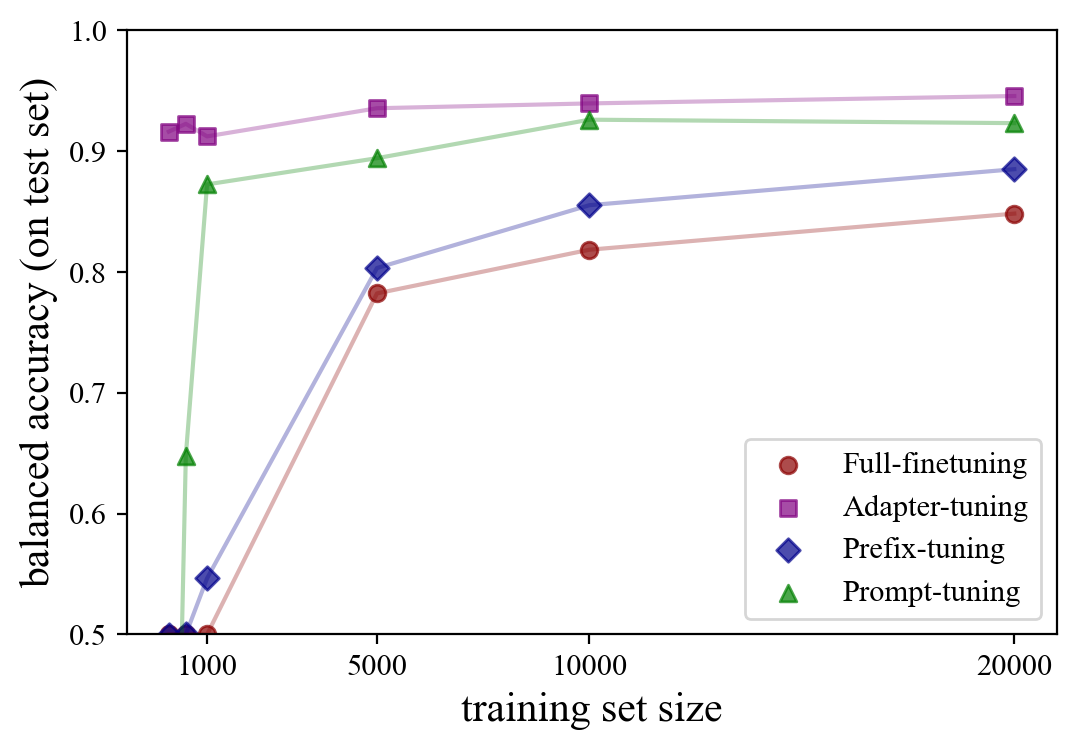

In [16]:
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels

plt.scatter(dataset_sizes, performance_track["full"]["scores"], alpha = 0.7, marker = "o", c = "darkred", label = "Full-finetuning")
plt.plot(dataset_sizes, performance_track["full"]["scores"], alpha = 0.3, c = "darkred")

plt.scatter(dataset_sizes, performance_track["adapter"]["scores"], alpha = 0.7, marker = ",", c = "purple", label = "Adapter-tuning")
plt.plot(dataset_sizes, performance_track["adapter"]["scores"], alpha = 0.3, c = "purple")

plt.scatter(dataset_sizes, performance_track["prefix"]["scores"], alpha = 0.7, marker = "D", c = "darkblue", label = "Prefix-tuning")
plt.plot(dataset_sizes, performance_track["prefix"]["scores"], alpha = 0.3, c = "darkblue")

plt.scatter(dataset_sizes, performance_track["prompt"]["scores"], alpha = 0.7, marker = "^", c = "green", label = "Prompt-tuning")
plt.plot(dataset_sizes, performance_track["prompt"]["scores"], alpha = 0.3, c = "green")

plt.xticks(dataset_sizes[2:])
plt.gca().set_ylim(bottom=0.5, top = 1.0)
plt.ylabel("balanced accuracy (on test set)")
plt.xlabel("training set size")
plt.legend()
# plt.xscale("log")
plt.savefig("Figures/exp_2__low_data.pdf", format="pdf", bbox_inches='tight')

In [17]:
performance_track["adapter"]["scores"]

[0.916238414751733,
 0.9226942201338237,
 0.9123153299903248,
 0.9355985760693586,
 0.939594891195139,
 0.9457085828343313]

In [37]:
path = "Saved_weights/EXP3/"

performance_track = {
    "Full-finetuning": {
        "file_format": "finetune_extrapolated.json",
        "score": 0,
        "color": "darkred"
    },
    "Adapter-tuning": {
        "file_format": "adapter_extrapolated.json",
        "score": 0,
        "color": "purple"
    },
    "Prefix-tuning": {
        "file_format": "prefix_extrapolated.json",
        "score": 0,
        "color": "darkblue"
    },
    "Prompt-tuning": {
        "file_format": "promt_extrapolated.json",
        "score": 0,
        "color": "green"
    },
}


full_perf = []
adapter_perf = []
prefix_perf = []
prompt_perf = []

for approach in performance_track:
    # print(ds, approach)
    file_path = path + performance_track[approach]["file_format"].format(ds)
    with open(file_path) as f:
        result = json.load(f)
        performance_track[approach]['score'] = result["balanced_accuracy"]

In [38]:
performance_track

{'Full-finetuning': {'file_format': 'finetune_extrapolated.json',
  'score': 0.7237452143216497,
  'color': 'darkred'},
 'Adapter-tuning': {'file_format': 'adapter_extrapolated.json',
  'score': 0.9228416042737457,
  'color': 'purple'},
 'Prefix-tuning': {'file_format': 'prefix_extrapolated.json',
  'score': 0.8887202987795076,
  'color': 'darkblue'},
 'Prompt-tuning': {'file_format': 'promt_extrapolated.json',
  'score': 0.8883681527511608,
  'color': 'green'}}

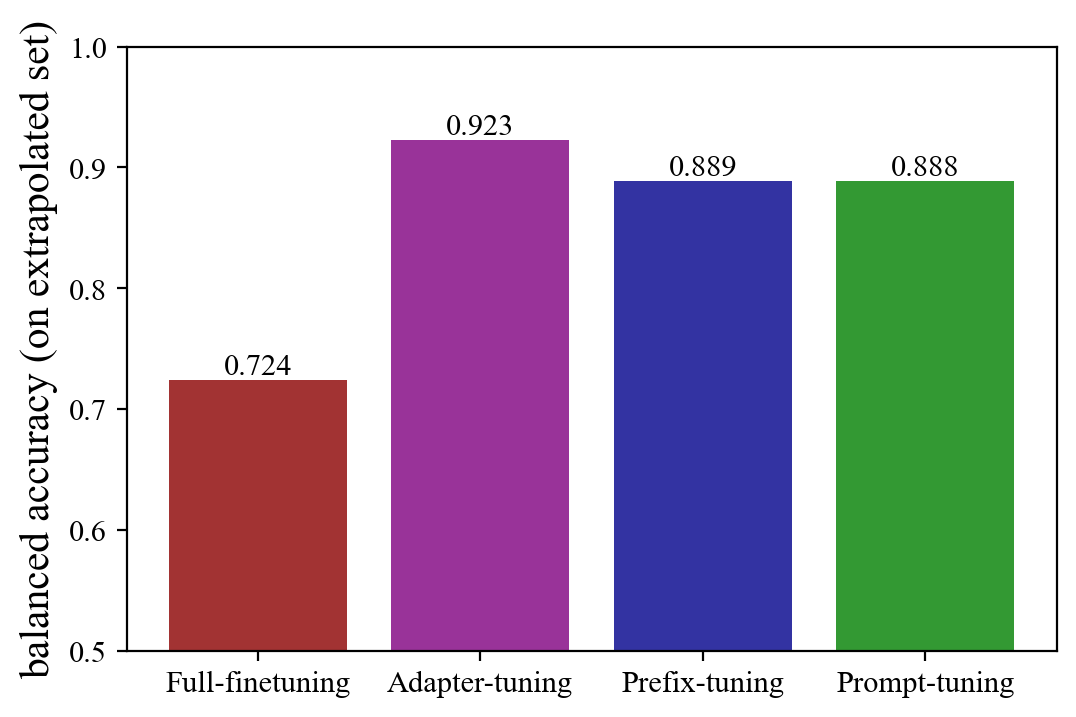

In [72]:
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("axes", titlesize=MEDIUM_SIZE)

scores = [performance_track[key]['score'] for key in performance_track]

barlist = plt.bar(
    list(performance_track.keys()),
    scores,
    color = [performance_track[key]['color'] for key in performance_track],
    alpha = 0.8
)

for rect, scr in zip(barlist, scores):
    height = rect.get_height()
    plt.text(
        rect.get_x() + rect.get_width() / 2, height, round(scr, 3), ha="center", va="bottom"
    )


plt.gca().set_ylim(bottom=0.5, top = 1)
plt.ylabel("balanced accuracy (on extrapolated set)")

plt.savefig("Figures/exp3_extrapolated.pdf", format="pdf", bbox_inches='tight')

In [56]:
barlist[0].get_height()

0.7237452143216497

In [62]:
round(height,2)

0.89